In [3]:
import import_ipynb
import optimizer as Optimizer
import matplotlib.pyplot as plt
import gradient as Gradient
from functions import *
import layer as Layer
from network import MultiLayerNet

import scaler as Scaler
import  initializer as Initializer 
 

import sys
sys.path.append("../../")
import import_ipynb
from dataset.mnist import load_mnist

import numpy as np
from collections import OrderedDict

importing Jupyter notebook from optimizer.ipynb
importing Jupyter notebook from gradient.ipynb
importing Jupyter notebook from functions.ipynb
importing Jupyter notebook from layer.ipynb
importing Jupyter notebook from initializer.ipynb
importing Jupyter notebook from network.ipynb
importing Jupyter notebook from scaler.ipynb
importing Jupyter notebook from ../..\dataset\mnist.ipynb


In [4]:
def make_sample_data_set():
    
    """
        x는 0~999999 정수이다.
        정답은 x를 100000으로 나눴을 때의 몫이다.
    """
    
    x = np.random.randint(999999, size=(10000,1))
    
    t_data = x.flatten() // 100000
    
    
    # t_data 원핫 인코딩 코드
    num = np.unique(t_data, axis=0)
    num = num.shape[0]
    t = np.eye(num)[t_data] 
    
    return x,t

def make_sample_data_set_regression():
    

    x = np.random.randint(9, size=(300, 1))
    y =np.dot(x, np.array([3]) )
    t = np.reshape(y, (y.shape[0],1))

    
    return x,t

def make_sample_data_set_regression2():
    

    x = np.random.randint(999999, size=(300, 2))
    y =np.dot(x, np.array([3,-2]) ) + 7
#     y =  y + (4 * np.random.random_sample((1,y.shape[0])) - 2).flatten()
    t = np.reshape(y, (y.shape[0],1))

    
    return x,t

### Regression

In [18]:
x_data, t_data = make_sample_data_set_regression2()

net = MultiLayerNet()
net.add_layer(Layer.Dense(1, input_size = 2, activation=Layer.IdentityWithLoss(), initializer = Initializer.Xavier() ))
# net.add_layer(Layer.Dense(5, input_size = 2, activation=Layer.Relu() ))
# net.add_layer(Layer.Dense(1))

x_train, t_train, x_test, t_test = shuffle_split_data(x_data, t_data, 0.2)

print(net.params)

scaler = Scaler.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

result = net.train(
        x_train, t_train, x_test, t_test, batch_size = 100, iters_num = 15, print_epoch = 1,
        optimizer = Optimizer.SGD()
)





predict_target = np.array([[1200, 500]])
print("target :" ,predict_target, "result : ",  net.predict(scaler.transform(predict_target)))
print("done!")


{'W0': array([[-0.01071318],
       [ 0.00088048]]), 'b0': array([0.])}
repeat 6 epoch
epoch | loss
epoch 1: 89522970.54707554
epoch 2: 234954.80362073096
epoch 3: 3.898453456364143
epoch 4: 0.010666154873838412
epoch 5: 9.059307938159004e-08
epoch 6: 1.0220183218535741e-11
epoch 6: 1.0220183218535741e-11
target : [[1200  500]] result :  [[2606.99999433]]
done!


In [ ]:
# x = np.arange(len(result["train_loss_list"]))
print( result["train_loss_list"][1])

plt.plot(x, result["train_loss_list"], label='loss',color="red",  marker='o')
plt.xlabel("i")
plt.ylabel("loss")
plt.ylim(0, 10000000)
plt.legend(loc='upper right')
plt.show()


### Classification

In [7]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)

x_data = np.append(x_train, x_test, axis=0)
t_data = np.append(t_train, t_test, axis=0)

net = MultiLayerNet()
net.add_layer(Layer.Dense(128, input_size = 784, activation = Layer.Relu(), ))
net.add_layer(Layer.Dense(10,  activation = Layer.SoftmaxWithLoss() ))

result = net.train(
        x_train, t_train, x_test, t_test, batch_size = 300, iters_num = 1000, print_epoch = 1,
        optimizer = Optimizer.Adam(lr=0.01) )

print("done!")

(60000, 784) (60000, 10) (10000, 784) (10000, 10)
repeat 5 epoch
epoch | train_acc | test_acc
epoch 1: 0.9635  |  0.9583
epoch 2: 0.9733  |  0.9674
epoch 3: 0.9823  |  0.9726
epoch 4: 0.9838  |  0.9733
epoch 4: 0.9868  |  0.9733
done!


In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)


x_data = np.append(x_train, x_test, axis=0)
t_data = np.append(t_train, t_test, axis=0)


def create_net():
    
    net = MultiLayerNet()
    net.add_layer(Layer.Dense(50, input_size = 784, activation = Layer.Relu() ))
    net.add_layer(Layer.Dense(10,  activation = Layer.SoftmaxWithLoss() ))
    
    return net


result = {
    
}

optimizer_list = ["sgd", "momentum", "rmsprop", "adam"]
lr_list = [0.001, 0.01 , 0.05, 0.1, 1]

for optimizer in optimizer_list:
    result[optimizer] = {} 
    
    for lr in lr_list:
        net = create_net()
        
        if optimizer == "sgd":
            opt = Optimizer.SGD(lr=lr)
        elif optimizer == "momentum":
            opt = Optimizer.Momentum(lr=lr)
        elif optimizer == "rmsprop":
            opt = Optimizer.RMSprop(lr=lr)
        elif optimizer == "adam":
            opt = Optimizer.Adam(lr=lr)
        
        print(optimizer, lr, " : ")
        
        train_result = net.train(
            x_train, t_train, x_test, t_test, batch_size = 300, iters_num = 3000, print_epoch = 1,
            optimizer = opt
        )
        
        result[optimizer][lr] = train_result

        
        

print("done!")

NameError: name 'Initializer' is not defined

In [ ]:
color_list = ["red", "blue", "green", "yellow", "purple"]

marker_list = ["o", "s", "^", "v","x" ]

plt.figure(figsize=(11, 9))
for j, optimizer in enumerate(optimizer_list):

    plt.subplot(221 + j)

    plt.xlabel("step")
    plt.ylabel("loss")
    plt.ylim(0, 3)
    plt.title(optimizer)




    for i, (lr, train_result) in enumerate(result[optimizer].items()):
        x = np.arange(len(train_result["train_loss_list"]))
#         print(len(x))
        plt.plot(x, train_result["train_loss_list"], label=str(lr),color = color_list[i],  marker=None)

        plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
import pickle
 
## Save pickle
with open("train_data.pickle","wb") as fw:
    pickle.dump(result, fw)


In [ ]:
with open("train_data.pickle","rb") as fr:
    result = pickle.load(fr)

result

In [ ]:
 result["sgd"][1].keys()

In [14]:
import pickle
 
## Save pickle
with open("train_data.pickle","wb") as fw:
    pickle.dump(result, fw)


In [4]:
with open("train_data.pickle","rb") as fr:
    result = pickle.load(fr)

result

NameError: name 'pickle' is not defined

In [26]:
 result["sgd"][1].keys()

dict_keys(['train_loss_list', 'train_acc_list', 'test_acc_list'])

In [33]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)

x_data = np.append(x_train, x_test, axis=0)
t_data = np.append(t_train, t_test, axis=0)

result = {}


net = MultiLayerNet()
net.add_layer(Layer.Dense(50, input_size = 784, activation = Layer.Relu(), initializer=Initializer.He() ))
net.add_layer(Layer.Dense(50, activation = Layer.Relu(), initializer=Initializer.He() ))
net.add_layer(Layer.Dense(10,  activation = Layer.SoftmaxWithLoss() ))

train_result = net.train(
        x_train, t_train, x_test, t_test, batch_size = 300, iters_num = 1000, print_epoch = 1,
        optimizer = Optimizer.SGD(lr=1) )

result["He"] = train_result


net = MultiLayerNet()
net.add_layer(Layer.Dense(50, input_size = 784, activation = Layer.Relu(), ))
net.add_layer(Layer.Dense(50, activation = Layer.Relu(), ))
net.add_layer(Layer.Dense(10,  activation = Layer.SoftmaxWithLoss() ))

train_result = net.train(
        x_train, t_train, x_test, t_test, batch_size = 300, iters_num = 1000, print_epoch = 1,
        optimizer = Optimizer.SGD(lr=1) )

result["std=0.01"] = train_result



net = MultiLayerNet()
net.add_layer(Layer.Dense(50, input_size = 784, activation = Layer.Relu(), initializer=Initializer.Std(std=0.5)))
net.add_layer(Layer.Dense(50, activation = Layer.Relu(), ))
net.add_layer(Layer.Dense(10,  activation = Layer.SoftmaxWithLoss() ))

train_result = net.train(
        x_train, t_train, x_test, t_test, batch_size = 300, iters_num = 1000, print_epoch = 1,
        optimizer = Optimizer.SGD(lr=1) )

result["std=0.5"] = train_result


(60000, 784) (60000, 10) (10000, 784) (10000, 10)
repeat 5 epoch
epoch | train_acc | test_acc
epoch 1: 0.7214  |  0.7216
epoch 2: 0.9239  |  0.9238
epoch 3: 0.8944  |  0.8901
epoch 4: 0.9299  |  0.9267
epoch 4: 0.9477  |  0.9410
repeat 5 epoch
epoch | train_acc | test_acc
epoch 1: 0.4762  |  0.4778
epoch 2: 0.9051  |  0.9081
epoch 3: 0.9257  |  0.9237
epoch 4: 0.9420  |  0.9399
epoch 4: 0.9466  |  0.9442
repeat 5 epoch
epoch | train_acc | test_acc
epoch 1: 0.8656  |  0.8703
epoch 2: 0.9146  |  0.9163
epoch 3: 0.9321  |  0.9271
epoch 4: 0.9445  |  0.9399
epoch 4: 0.9494  |  0.9364


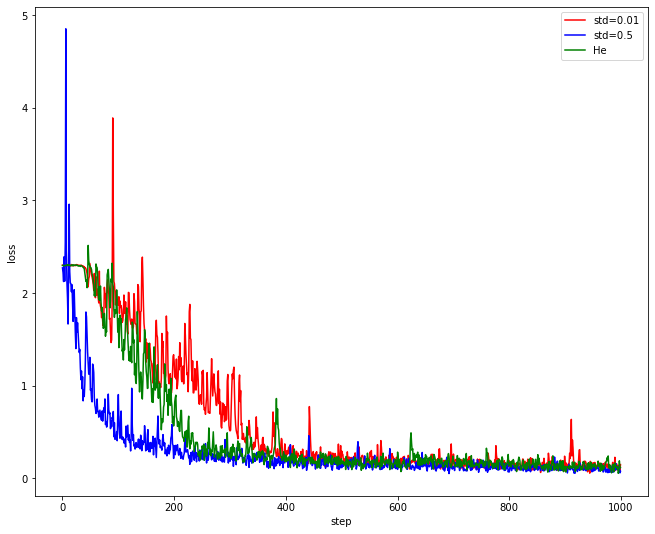

In [35]:
color_list = ["red", "blue", "green", "yellow", "purple"]

marker_list = ["o", "s", "^", "v","x" ]

plt.figure(figsize=(11, 9))


plt.xlabel("step")
plt.ylabel("loss")
# plt.ylim(0, 3)




x = np.arange(len(result["std=0.01"]["train_loss_list"]))

plt.plot(x, result["std=0.01"]["train_loss_list"], label="std=0.01",color = color_list[0],  marker=None)
plt.plot(x, result["std=0.5"]["train_loss_list"], label="std=0.5",color = color_list[1],  marker=None)
plt.plot(x, result["He"]["train_loss_list"], label="He",color = color_list[2],  marker=None)

plt.legend(loc='upper right')

plt.show()


## 